# House price prediction

This data set is taken from Kaggle. Source: https://www.kaggle.com/anthonypino/melbourne-housing-market. 
The goal here is to predict the house price based on the information availabe in the dataset

### Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt

In [2]:
df_house_price = pd.read_csv('../csv_file/Melbourne_housing_FULL.csv')

In [3]:
pd.set_option('display.max_columns', None)
df_house_price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Explore the Data

In [4]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
percent_missing = df_house_price.isnull().sum() * 100 / len(df_house_price)
percent_missing

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

### Dataset criteria

This dataset meets the following criteria
1. Number of features: It has 20 features
2. Number of instances: The dataset has 34009 instances
3. Categorical columns: It has 10 categorical/ordinal columns.
4. Missing values: There are 20-60 percent of missing values in 9 columns of the dataset.

#### Price, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Longitude, Latitude, Regionname, PropertyCount are missing values.  Price(21%),  bedroom2(23.57%),  bathroom(23.59%), car(25%), landsize(33.88%),  bathroom(23.59%), buildingArea(60.57%), Yearbuilt( 55.38%) , Lattitude(22.88%), Longitude(22.88%) has too many missing values

##### Dropping the columns that won't be used for model training:
Address, Longtitude, Lattitude, Suburb, SellerG, CouncilArea does not contain any useful information for the Machine Learning model so they are being dropped before further processing

In [6]:
df_house_price = df_house_price.drop(['Address','Longtitude', 'Lattitude','Suburb', 'SellerG', 'CouncilArea'], axis=1)
df_house_price.shape

(34857, 15)

##### Missing values percentage count

In [7]:
df_house_price.dropna(subset=["Price"], inplace=True)
print(df_house_price.shape)
percent_missing = df_house_price.isnull().sum() * 100 / len(df_house_price)
percent_missing

(27247, 15)


Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bedroom2         23.639300
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
BuildingArea     60.891107
YearBuilt        55.650163
Regionname        0.011010
Propertycount     0.011010
dtype: float64

#### Data visualization

<AxesSubplot:title={'center':'Rooms'}, ylabel='Frequency'>

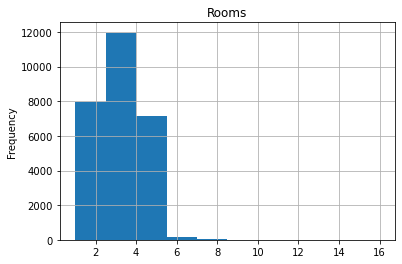

In [8]:
df_house_price['Rooms'].plot(kind = 'hist', grid = True, title = 'Rooms')

In [9]:
df_house_price.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,27247.000000,2.724700e+04,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,27244.000000
mean,2.992293,1.050173e+06,11.280276,3113.796080,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,7566.781089
std,0.954795,6.414671e+05,6.787469,111.139676,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,4492.382418
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,83.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,4294.000000
50%,3.000000,8.700000e+05,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,6567.000000
75%,4.000000,1.295000e+06,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,21650.000000


In [10]:
df_house_price['Rooms'].value_counts()

3     11957
2      6787
4      5918
5      1209
1      1196
6       137
7        20
8        14
10        5
12        2
16        1
9         1
Name: Rooms, dtype: int64

In [11]:
df_house_price['Price'].head()

1    1480000.0
2    1035000.0
4    1465000.0
5     850000.0
6    1600000.0
Name: Price, dtype: float64

In [12]:
df_house_price.loc[df_house_price['Bedroom2'] == 20]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
12043,3,h,1650000.0,PI,6/08/2016,9.3,3145.0,20.0,1.0,2.0,875.0,NaN,NaN,Southern Metropolitan,608.0


In [13]:
df_house_price.loc[df_house_price['Bedroom2'] == 30]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount


In [14]:
df_house_price.loc[df_house_price['Bedroom2'] == 16]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
26210,16,h,5000000.0,S,28/10/2017,17.2,3132.0,16.0,8.0,8.0,NaN,NaN,NaN,Eastern Metropolitan,6871.0


<AxesSubplot:title={'center':'Regionname Counts'}>

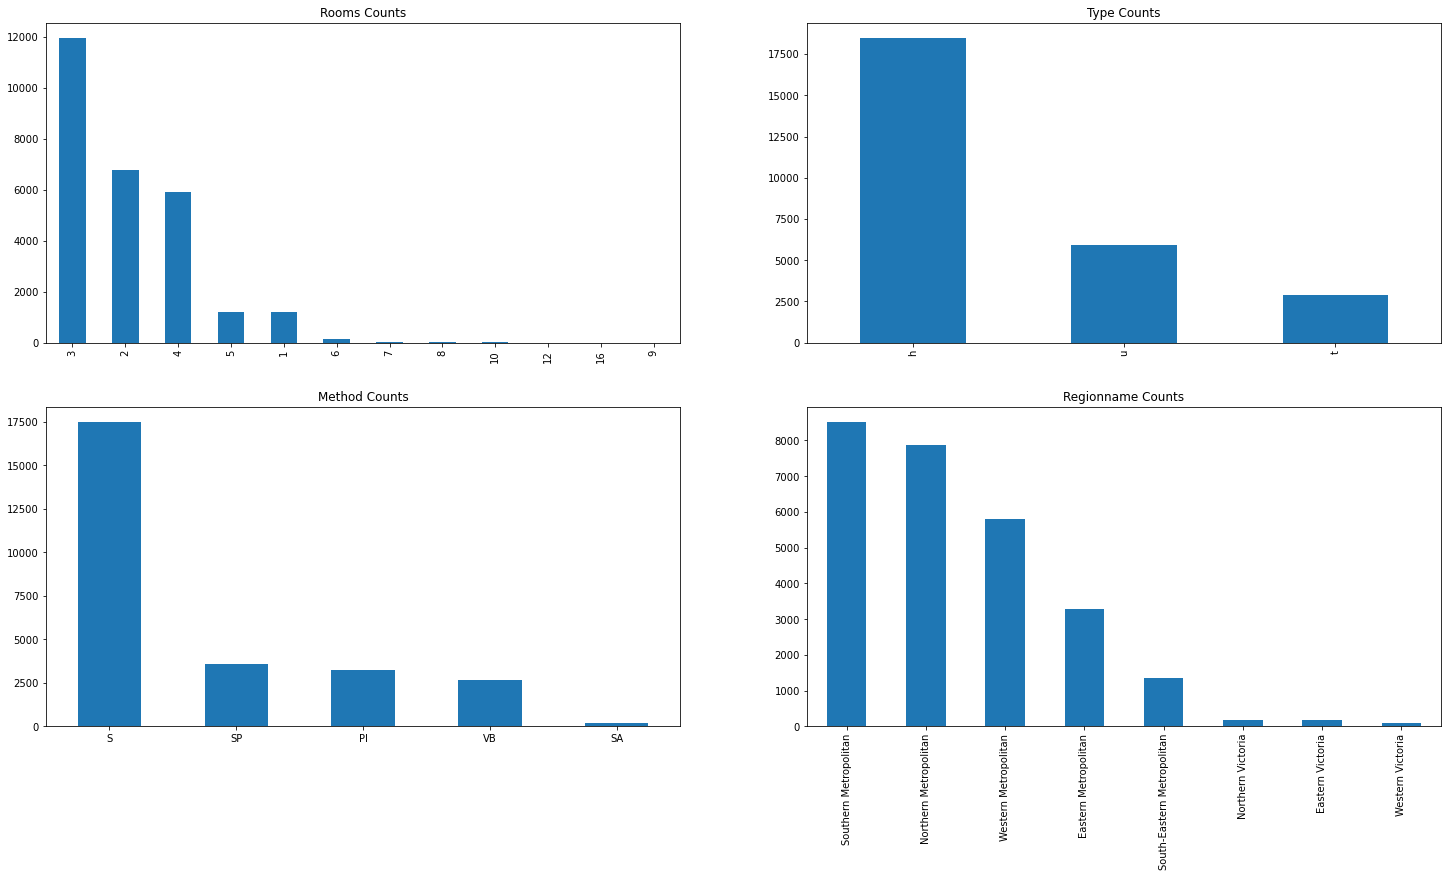

In [15]:
# Set up a grid of plots
fizsize_with_subplots = (25,20)
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot Rooms counts
plt.subplot2grid(fig_dims, (0, 0))
df_house_price['Rooms'].value_counts().plot(kind='bar', 
                                         title='Rooms Counts')

# Plot Type counts
plt.subplot2grid(fig_dims, (0, 1))
df_house_price['Type'].value_counts().plot(kind='bar', 
                                       title='Type Counts')

# Plot Method counts
plt.subplot2grid(fig_dims, (1, 0))
df_house_price['Method'].value_counts().plot(kind='bar', 
                                    title='Method Counts')
plt.xticks(rotation=0)

# Plot Regionname counts
plt.subplot2grid(fig_dims, (1, 1))
df_house_price['Regionname'].value_counts().plot(kind='bar', 
                                         title='Regionname Counts')



<AxesSubplot:title={'center':'Bathroom Counts'}>

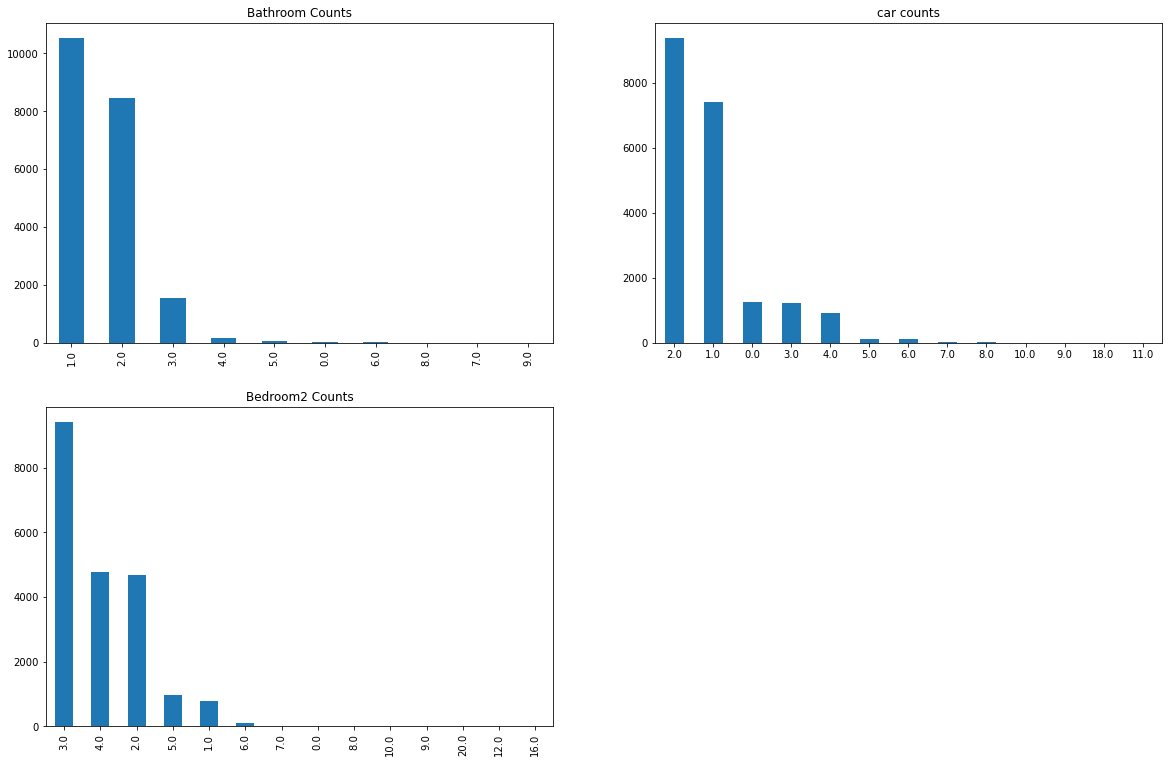

In [16]:
# Set up a grid of plots
fizsize_with_subplots = (20, 20)
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3,2)


# Plot Bedroom2 counts
plt.subplot2grid(fig_dims, (1,0))
df_house_price['Bedroom2'].value_counts().plot(kind='bar', 
                                         title='Bedroom2 Counts')

# Plot Car counts
plt.subplot2grid(fig_dims, (0, 1))
df_house_price['Car'].value_counts().plot(kind='bar',title= 'car counts')
 
plt.xticks(rotation=0)                                          

# Plot Bathroom counts
plt.subplot2grid(fig_dims, (0, 0))
df_house_price['Bathroom'].value_counts().plot(kind='bar', 
                                    title='Bathroom Counts')

# Imputing missing values

In [17]:
# There are mising values in Bedroom2 which is replaced by  the mode value
df_house_price['Bedroom2'].fillna(df_house_price['Bedroom2'].mode()[0], inplace = True)
df_house_price['Bedroom2'].value_counts()

3.0     15857
4.0      4766
2.0      4696
5.0       983
1.0       781
6.0       110
7.0        19
0.0        16
8.0         9
10.0        4
9.0         3
20.0        1
12.0        1
16.0        1
Name: Bedroom2, dtype: int64

In [18]:
# There are mising values in Postcode which is replaced by  the mode value
df_house_price['Postcode'].fillna(df_house_price['Postcode'].mode()[0], inplace = True)
df_house_price['Postcode'].value_counts()

3073.0    728
3046.0    545
3020.0    544
3165.0    493
3121.0    489
         ... 
3428.0      1
3786.0      1
3793.0      1
3770.0      1
3775.0      1
Name: Postcode, Length: 209, dtype: int64

In [19]:
# There are mising values in Bathroom which is replaced by  the mode value
df_house_price['Bathroom'].fillna(df_house_price['Bathroom'].mode()[0], inplace = True)
df_house_price['Bathroom'].value_counts()

1.0    16974
2.0     8464
3.0     1537
4.0      176
5.0       46
0.0       34
6.0       10
8.0        3
7.0        2
9.0        1
Name: Bathroom, dtype: int64

In [20]:
# There are mising values in Car which is replaced by  the mode value
df_house_price['Car'].fillna(df_house_price['Car'].mode()[0], inplace = True)
df_house_price['Car'].value_counts()

2.0     16191
1.0      7400
0.0      1251
3.0      1234
4.0       907
5.0       113
6.0       105
7.0        19
8.0        18
10.0        5
9.0         2
18.0        1
11.0        1
Name: Car, dtype: int64

In [21]:
# There are mising values in YearBuilt which is replaced by  the median value
df_house_price['YearBuilt'].fillna(df_house_price['YearBuilt'].median(), inplace = True)
df_house_price['YearBuilt'].describe()

count    27247.000000
mean      1968.496165
std         24.539477
min       1196.000000
25%       1970.000000
50%       1970.000000
75%       1970.000000
max       2019.000000
Name: YearBuilt, dtype: float64

In [22]:
# There are mising values in BuildingArea which is replaced by  the median value
df_house_price['BuildingArea'].fillna(df_house_price['BuildingArea'].median(), inplace = True)
df_house_price['BuildingArea'].describe()

count    27247.000000
mean       142.321442
std        281.163583
min          0.000000
25%        133.000000
50%        133.000000
75%        133.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [23]:
# There are mising values in Landsize which is replaced by  the median value
df_house_price['Landsize'].fillna(df_house_price['Landsize'].median(), inplace = True)
df_house_price['Landsize'].describe()

count     27247.000000
mean        565.779645
std        3052.546357
min           0.000000
25%         351.000000
50%         512.000000
75%         592.000000
max      433014.000000
Name: Landsize, dtype: float64

Replacing missing value with median is most appropriate in the case of handling the skewed data because there is huge difference b/w mean and max value.

In [24]:
# Dropping a few missing values
df_house_price.dropna(subset=['Distance','Postcode', 'Regionname','Propertycount'], inplace=True)


Dropping the missing values of Distance, Postcode, Regionname, Propertycount and Council area because 
all these column have only 1 or 2 missing value which is less than 0.000001% of total values count.

In [25]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          27244 non-null  int64  
 1   Type           27244 non-null  object 
 2   Price          27244 non-null  float64
 3   Method         27244 non-null  object 
 4   Date           27244 non-null  object 
 5   Distance       27244 non-null  float64
 6   Postcode       27244 non-null  float64
 7   Bedroom2       27244 non-null  float64
 8   Bathroom       27244 non-null  float64
 9   Car            27244 non-null  float64
 10  Landsize       27244 non-null  float64
 11  BuildingArea   27244 non-null  float64
 12  YearBuilt      27244 non-null  float64
 13  Regionname     27244 non-null  object 
 14  Propertycount  27244 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 3.3+ MB


### Outlier Handling

#### Identify Outlier

<AxesSubplot:>

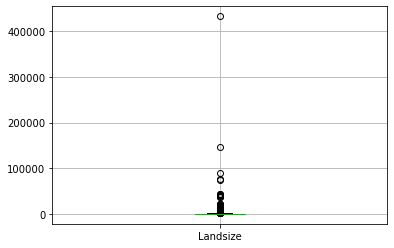

In [26]:
df_house_price.boxplot(column='Landsize', return_type='axes')

It can be observed from the box plot that there are some outliers at the right end of the distribution. These outliers can be replaced by NaNs which will then be imputed in the next step

In [27]:
q75_landsize, q25_landsize = np.percentile(df_house_price['Landsize'], [75 ,25])
iqr_landsize = q75_landsize - q25_landsize
landsize_upper_limit =  q75_landsize + 1.5*iqr_landsize
print(landsize_upper_limit)

953.5


Replacing all values of landsize above 1.5 times the interquartile range of 3rd Quantile with the median values

In [28]:
df_house_price.loc[df_house_price['Landsize'] >  landsize_upper_limit] = df_house_price['Landsize'].median()
df_house_price['Landsize'].describe()

count    27244.000000
mean       460.732528
std        208.331122
min          0.000000
25%        351.000000
50%        512.000000
75%        560.000000
max        953.000000
Name: Landsize, dtype: float64

<AxesSubplot:>

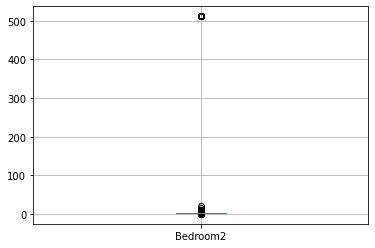

In [29]:
df_house_price.boxplot(column='Bedroom2', return_type='axes')

It can be observed from the box plot that there are some outliers in the distribution. These outliers can be replaced by NaNs which will then be imputed in the next step

In [30]:
# Bedroom2_upper_limit = 10
df_house_price.loc[df_house_price['Bedroom2'] >  10] = df_house_price['Bathroom'].mode()[0]
df_house_price['Bedroom2'].value_counts()

3.0     15586
4.0      4547
2.0      4399
1.0      1693
5.0       890
6.0        85
7.0        17
0.0        15
8.0         7
10.0        4
9.0         1
Name: Bedroom2, dtype: int64

<AxesSubplot:>

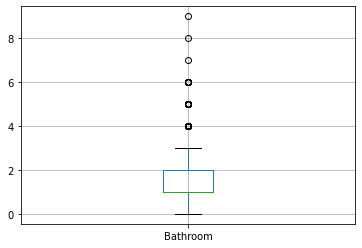

In [31]:
df_house_price.boxplot(column=['Bathroom'], return_type='axes')

It can be observed from the box plot that there are some outliers in the distribution. These outliers can be replaced by NaNs which will then be imputed in the next step

In [32]:
df_house_price.loc[df_house_price['Bathroom'] >  6] = df_house_price['Bathroom'].mode()[0]
df_house_price['Bathroom'].value_counts()

1.0    17526
2.0     8064
3.0     1423
4.0      152
5.0       38
0.0       33
6.0        8
Name: Bathroom, dtype: int64

<AxesSubplot:>

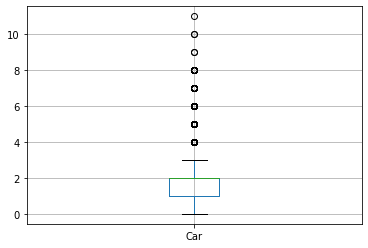

In [33]:
df_house_price.boxplot(column='Car', return_type='axes')

It can be observed from the box plot that there are some outliers in the distribution. These outliers can be replaced by NaNs which will then be imputed in the next step

In [34]:
df_house_price.loc[df_house_price['Car'] >  6] = df_house_price['Car'].mode()[0]
df_house_price['Car'].value_counts()

2.0    15823
1.0     8021
0.0     1209
3.0     1169
4.0      832
5.0      101
6.0       89
Name: Car, dtype: int64

<AxesSubplot:>

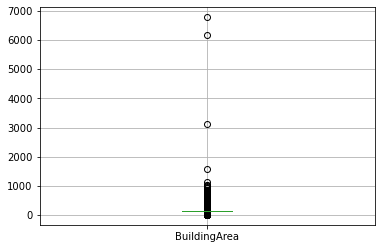

In [35]:
df_house_price.boxplot(column='BuildingArea', return_type='axes')

It can be observed from the box plot that there are some outliers in the distribution. These outliers can be replaced by NaNs which will then be imputed in the next step

In [36]:
q75_BuildingArea, q25_BuildingArea = np.percentile(df_house_price['BuildingArea'], [75 ,25])
iqr_BuildingArea = q75_BuildingArea - q25_BuildingArea
BuildingArea_upper_limit =  q75_BuildingArea + 1.5*iqr_BuildingArea
print(BuildingArea_upper_limit)

133.0


In [37]:
df_house_price.loc[df_house_price['BuildingArea'] >  landsize_upper_limit] = df_house_price['BuildingArea'].median()
df_house_price['BuildingArea'].describe()

count    27244.000000
mean       134.131969
std         57.583558
min          0.000000
25%        133.000000
50%        133.000000
75%        133.000000
max        934.000000
Name: BuildingArea, dtype: float64

## Feature Engineering

##### Creating a column `age_house` by subtracting `YearBuilt` from `Date` to determine how old the house is which might be an important feature in the ML model

In [38]:
df_house_price['Date'] =  pd.to_datetime(df_house_price['Date'])
df_house_price['YearBuilt'] =  pd.to_datetime(df_house_price['YearBuilt'])

df_house_price['age_house'] = df_house_price['Date'].dt.year - df_house_price['YearBuilt'].dt.year 


In [39]:
df_house_price['age_house'].describe()

count    27244.000000
mean        45.050103
std          8.996821
min          0.000000
25%         46.000000
50%         47.000000
75%         47.000000
max         48.000000
Name: age_house, dtype: float64

In [40]:
# Droping 'yearbuilt' and 'date'
df_house_price = df_house_price.drop(['YearBuilt','Date'], axis=1)

## One hot encoding

In [41]:
# Replacing Type with a one-hot vector of length 6
cols = pd.get_dummies(df_house_price['Type'], prefix= 'Type')
df_house_price[cols.columns] = cols
df_house_price.drop('Type', axis = 1, inplace = True)
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          27244 non-null  float64
 1   Price          27244 non-null  float64
 2   Method         27244 non-null  object 
 3   Distance       27244 non-null  float64
 4   Postcode       27244 non-null  float64
 5   Bedroom2       27244 non-null  float64
 6   Bathroom       27244 non-null  float64
 7   Car            27244 non-null  float64
 8   Landsize       27244 non-null  float64
 9   BuildingArea   27244 non-null  float64
 10  Regionname     27244 non-null  object 
 11  Propertycount  27244 non-null  float64
 12  age_house      27244 non-null  int64  
 13  Type_1.0       27244 non-null  uint8  
 14  Type_2.0       27244 non-null  uint8  
 15  Type_133.0     27244 non-null  uint8  
 16  Type_h         27244 non-null  uint8  
 17  Type_t         27244 non-null  uint8  
 18  Type_u

In [42]:
# Replacing Method with a one-hot vector of length 8
cols = pd.get_dummies(df_house_price['Method'], prefix= 'Method')
df_house_price[cols.columns] = cols
df_house_price.drop('Method', axis = 1, inplace = True)
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          27244 non-null  float64
 1   Price          27244 non-null  float64
 2   Distance       27244 non-null  float64
 3   Postcode       27244 non-null  float64
 4   Bedroom2       27244 non-null  float64
 5   Bathroom       27244 non-null  float64
 6   Car            27244 non-null  float64
 7   Landsize       27244 non-null  float64
 8   BuildingArea   27244 non-null  float64
 9   Regionname     27244 non-null  object 
 10  Propertycount  27244 non-null  float64
 11  age_house      27244 non-null  int64  
 12  Type_1.0       27244 non-null  uint8  
 13  Type_2.0       27244 non-null  uint8  
 14  Type_133.0     27244 non-null  uint8  
 15  Type_h         27244 non-null  uint8  
 16  Type_t         27244 non-null  uint8  
 17  Type_u         27244 non-null  uint8  
 18  Method

In [43]:
# Replacing Regionname with a one-hot vector of length 11
cols = pd.get_dummies(df_house_price['Regionname'], prefix= 'Regionname')
df_house_price[cols.columns] = cols
df_house_price.drop('Regionname', axis = 1, inplace = True)
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  27244 non-null  float64
 1   Price                                  27244 non-null  float64
 2   Distance                               27244 non-null  float64
 3   Postcode                               27244 non-null  float64
 4   Bedroom2                               27244 non-null  float64
 5   Bathroom                               27244 non-null  float64
 6   Car                                    27244 non-null  float64
 7   Landsize                               27244 non-null  float64
 8   BuildingArea                           27244 non-null  float64
 9   Propertycount                          27244 non-null  float64
 10  age_house                              27244 non-null  int64  
 11  Ty

## Spliting the data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = df_house_price["Price"]
X = df_house_price.drop('Price', axis = 1)

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

## Model Building

#### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.6297996731874602
Test Score for Linear Regression: 0.6275456026680641


#### Ridge Regression

In [46]:
#Ridge(random_state = 0)
from sklearn.linear_model import Ridge

ridge = Ridge(random_state= 0)
ridge.fit(X_train, y_train)

print('Train Score for Ridge Regression:', ridge.score(X_train, y_train))
print('Test Score for Ridge Regression:', ridge.score(X_test, y_test))


Train Score for Ridge Regression: 0.629799236156962
Test Score for Ridge Regression: 0.6275484725701368


#### Lasso Regression

In [47]:
#Lasso(random_state = 0)
from sklearn.linear_model import Lasso

lasso = Lasso(random_state= 0)
lasso.fit(X_train, y_train)

print('Train Score for Lasso Regression:', lasso.score(X_train, y_train))
print('Test Score for Lasso Regression:', lasso.score(X_test, y_test))

Train Score for Lasso Regression: 0.6297995622144541
Test Score for Lasso Regression: 0.6275426034402742


C:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317803744947816.0, tolerance: 837564064307.3306
  model = cd_fast.enet_coordinate_descent(


#### Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
polreg = LinearRegression()
polreg.fit(X_train_poly, y_train)

print('Train Score for polynomial Regression:', polreg.score(X_train_poly, y_train))
print('Test Score for polynomial Regression:', polreg.score(X_test_poly, y_test))


Train Score for polynomial Regression: 0.7419829492234704
Test Score for polynomial Regression: -11565682568.554972


#### Decision Tree Regression

In [49]:
#DecisionTreeRegressor(max_depth = 2, random_state= 0)
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(max_depth = 2, random_state= 0)
dr.fit(X_train, y_train)

print('Train Score for Decision Tree Regression:', dr.score(X_train, y_train))
print('Test Score for Decision Tree Regression:', dr.score(X_test, y_test))

Train Score for Decision Tree Regression: 0.4076146711462383
Test Score for Decision Tree Regression: 0.40416865941910396


#### KNN Regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print('Train Score for KNN Regression:', knn.score(X_train, y_train))
print('Test Score for KNN Regression:', knn.score(X_test, y_test))

Train Score for KNN Regression: 0.8056660736375862
Test Score for KNN Regression: 0.7101587470578505


#### Knn regressor with default parameters is overfitting the training data set

####  Simple SVM Regression

In [51]:
#SVR()
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

print('Train Score for SVM Regression:', svr.score(X_train, y_train))
print('Test Score for SVM Regression:', svr.score(X_test, y_test))


Train Score for SVM Regression: -0.054468010979434656
Test Score for SVM Regression: -0.05569460952643723


#### SVM Regression with rbf kernel

In [52]:
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train, y_train)

print('Train Score for SVM rbf Regression:', svr_rbf.score(X_train, y_train))
print('Test Score for SVM rbf Regression:', svr_rbf.score(X_test, y_test))


Train Score for SVM rbf Regression: -0.054468010979434656
Test Score for SVM rbf Regression: -0.05569460952643723


#### SVM Regression with poly kernel

In [53]:
svr_poly = SVR(kernel = 'poly')
svr_poly.fit(X_train, y_train)

print('Train Score for SVM poly Regression:', svr_poly.score(X_train, y_train))
print('Test Score for SVM poly Regression:', svr_poly.score(X_test, y_test))

Train Score for SVM poly Regression: -0.044215074032970536
Test Score for SVM poly Regression: -0.04443175726479365


#### SVM Regression with linear kernel

In [54]:
svr_linear = SVR(kernel = 'linear')
svr_linear.fit(X_train, y_train)

print('Train Score for SVM linear Regression:', svr_linear.score(X_train, y_train))
print('Test Score for SVM linear Regression:', svr_linear.score(X_test, y_test))

Train Score for SVM linear Regression: 0.0008710767034781908
Test Score for SVM linear Regression: -0.0006853196423397545


## Grid Search with Cross-Validation

### Grid search for lasso

In [55]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

lasso = Lasso(random_state= 0)

param_grid = {'alpha': [10, 20, 30, 40, 50, 100]}
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(lasso,cv=5,
             param_grid=param_grid,
                return_train_score=True )
grid_search.fit(X_train, y_train)

Parameter grid:
{'alpha': [10, 20, 30, 40, 50, 100]}


GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [10, 20, 30, 40, 50, 100]},
             return_train_score=True)

In [56]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'alpha': 30}
Best cross-validation score: 0.62939


In [57]:
x_range = [1, 10, 100, 1000, 10000]
train_score_list_lasso = []
test_score_list_lasso = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list_lasso.append(lasso.score(X_train,y_train))
    test_score_list_lasso.append(lasso.score(X_test, y_test))

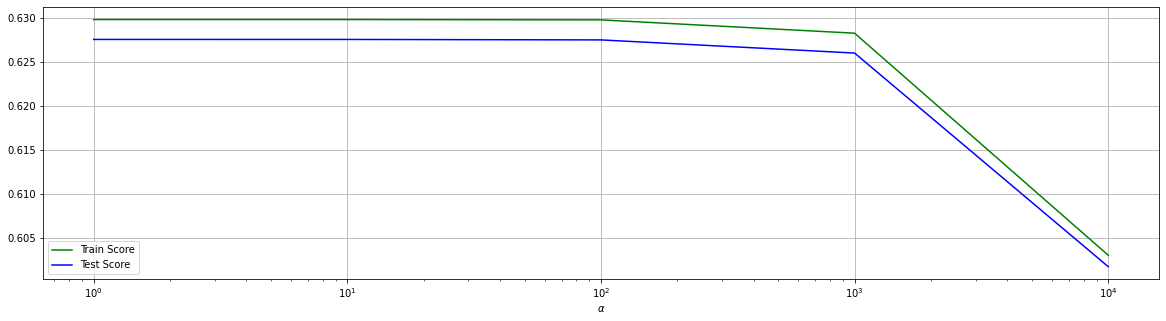

In [58]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list_lasso, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list_lasso, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [59]:
lasso_best = Lasso(alpha=1000)
lasso_best.fit(X_train, y_train)

print('Train Score for best Lasso Regression:', lasso_best.score(X_train, y_train))
print('Test Score for best Lasso Regression:', lasso_best.score(X_test, y_test))

Train Score for best Lasso Regression: 0.6282520437972311
Test Score for best Lasso Regression: 0.6259965100592081


### Grid search for SVR

In [60]:
svr = SVR(kernel = 'rbf')
print("Parameter grid:\n{}".format(param_grid))
# grid_search = GridSearchCV(svr(), param_grid, cv=5, return_train_score=True)
grid_search_svr = GridSearchCV(svr,cv=5,
             param_grid={'C':[0.1,10],'gamma':[0.1,10]},
                         return_train_score=True )
grid_search_svr.fit(X_train, y_train)

Parameter grid:
{'alpha': [10, 20, 30, 40, 50, 100]}


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 10], 'gamma': [0.1, 10]},
             return_train_score=True)

In [61]:
print("Best parameters for SVR: {}".format(grid_search_svr.best_params_))
print("Best cross-validation score for SVR: {:.5f}".format(grid_search_svr.best_score_))

Best parameters for SVR: {'C': 10, 'gamma': 0.1}
Best cross-validation score for SVR: -0.04764


### Grid search for KNN

In [62]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,5, 10, 50, 100, 500]}
print("Parameter grid:\n{}".format(param_grid))
grid_search_knn = GridSearchCV(knn,cv=5,
             param_grid=param_grid,
                return_train_score=True )
grid_search_knn.fit(X_train, y_train)


Parameter grid:
{'n_neighbors': [1, 5, 10, 50, 100, 500]}


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 10, 50, 100, 500]},
             return_train_score=True)

In [63]:
print("Best parameters for knn: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score for knn: {:.5f}".format(grid_search_knn.best_score_))

Best parameters for knn: {'n_neighbors': 10}
Best cross-validation score for knn: 0.70308


In [64]:
train_score_array_knn = []
test_score_array_knn = []

for k in range(1,20):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array_knn.append(knn.score(X_train, y_train))
    test_score_array_knn.append(knn.score(X_test, y_test))

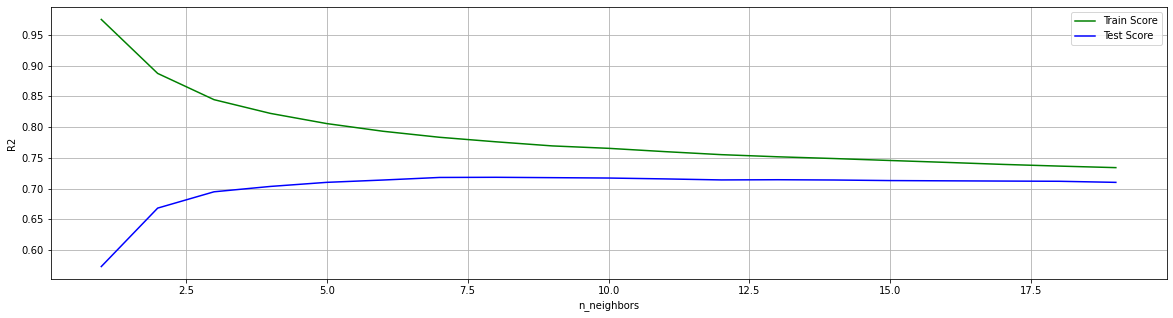

In [65]:
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array_knn, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array_knn, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('R2')
# plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

In [66]:
from sklearn.neighbors import KNeighborsRegressor
knn_best = KNeighborsRegressor(n_neighbors=10)
knn_best.fit(X_train, y_train)

print('Train Score for best KNN Regression:', knn_best.score(X_train, y_train))
print('Test Score for best KNN Regression:', knn_best.score(X_test, y_test))

Train Score for best KNN Regression: 0.7654419993002003
Test Score for best KNN Regression: 0.7171663022423127


In [67]:
tree = DecisionTreeRegressor()

param_grid = {'max_depth': [1, 5, 10, 25, 50]}

print("Parameter grid:\n{}".format(param_grid))
grid_search_dr = GridSearchCV(tree, param_grid, cv=5,
                  scoring="r2", return_train_score=True )
grid_search_dr.fit(X_train, y_train)

Parameter grid:
{'max_depth': [1, 5, 10, 25, 50]}


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 5, 10, 25, 50]},
             return_train_score=True, scoring='r2')

In [68]:
print("Best parameters: {}".format(grid_search_dr.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search_dr.best_score_))

Best parameters: {'max_depth': 10}
Best cross-validation score: 0.70025


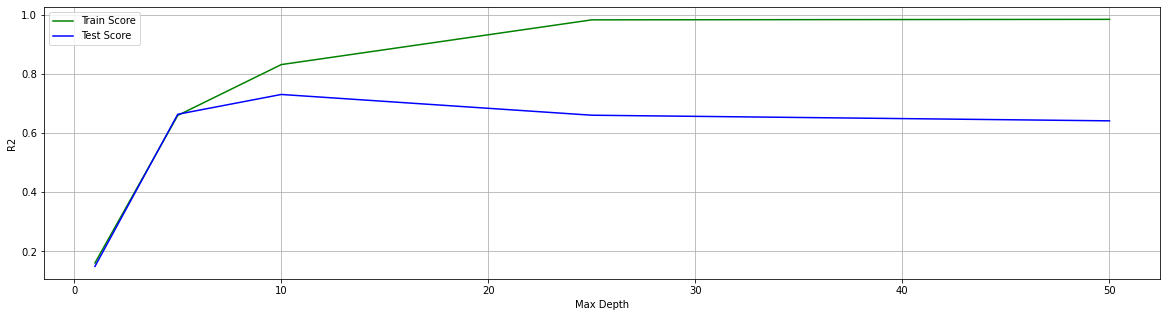

In [69]:
train_score_array_dr = []
test_score_array_dr = []
depth_range = [1, 5, 10, 25, 50]
for k in depth_range:
    tree = DecisionTreeRegressor(max_depth=k)
    tree.fit(X_train, y_train)
    train_score_array_dr.append(tree.score(X_train, y_train))
    test_score_array_dr.append(tree.score(X_test, y_test))

    
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(depth_range, train_score_array_dr, label = 'Train Score', c = 'g')
plt.plot(depth_range, test_score_array_dr, label = 'Test Score', c='b')
plt.xlabel('Max Depth')
plt.ylabel('R2')
# plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

In [70]:
dr_best = DecisionTreeRegressor(max_depth = 8)
dr_best.fit(X_train, y_train)

print('Train Score for best Decision Tree Regression:', dr_best.score(X_train, y_train))
print('Test Score for best Decision Tree Regression:', dr_best.score(X_test, y_test))

Train Score for best Decision Tree Regression: 0.7652919826666388
Test Score for best Decision Tree Regression: 0.720174402799798


## Conclusion
Knn regression with n_neighbors = 10 is the best regression model with 0.72 R2 score on the test data set (and 0.76 on the train dataset) 

## Prediction on the test data

In [71]:
prediction = knn_best.predict(X_test)


In [72]:
prediction

array([ 481000.,  999550., 1326000., ..., 1274700., 1257500., 2147400.])